In [3995]:
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 
from scipy.stats import pearsonr

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

#Add Extra Modules
from math import sin, cos, sqrt, atan2
from datetime import datetime, timedelta
import cpi
import re



# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 
pd.options.display.max_columns = None
pd.options.display.width = None

In [3996]:
data = pd.read_csv("data/kc_house_data.csv")
df_school = pd.read_csv('data/AIM-EOC-MSP-SBA_Assessments_School__with_suppression_-_new_format__2017.csv')
crime = pd.read_csv('data/KCSO_Offense_Reports__2020_to_Present.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [3997]:
crime.head()

,case_number,incident_datetime,nibrs_code,nibrs_code_name,block_address,city,state,zip,reporting_area,district,precinct,created_at,updated_at,hour_of_day,day_of_week,ID
0,C21034525,10/29/2021 11:21:00 AM,120,Robbery,14900 Block 4TH AVE SW,BURIEN,WA,98166,Reporting Area N05051,District N5,4.00,10/29/2021 03:04:35 PM,10/29/2021 03:39:50 PM,11,6,29495462116
1,C21034462,10/28/2021 08:10:00 PM,290,Destruction/Damage/Vandalism of Property,17600 Block 152ND PL SE,RENTON,WA,98058,Reporting Area F05007,District F5,3.00,10/29/2021 02:49:33 PM,10/29/2021 02:50:04 PM,20,5,29495152983
2,C21034548,10/29/2021 12:30:00 AM,240,Motor Vehicle Theft,100 Block SW 112TH ST,SEATTLE,WA,98146,Reporting Area K01012,District K1,4.00,10/29/2021 05:09:55 PM,10/29/2021 05:11:18 PM,0,6,29497952486
3,C21034576,10/28/2021 05:00:00 PM,13B,Simple Assault,14400 Block 162ND AVE SE,RENTON,WA,98059,Reporting Area F02003,District F2,3.00,10/29/2021 07:00:11 PM,10/29/2021 07:05:25 PM,17,5,29500173040
4,C22012227,04/12/2022 08:36:00 PM,13B,Simple Assault,2800 Block NE 200TH ST,SHORELINE,WA,98155,Reporting Area A05004,District A5,5.00,04/13/2022 06:35:07 AM,04/13/2022 06:36:30 AM,20,3,32749306796


In [3998]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63618 entries, 0 to 63617
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   case_number        63618 non-null  object 
 1   incident_datetime  63618 non-null  object 
 2   nibrs_code         63618 non-null  object 
 3   nibrs_code_name    63618 non-null  object 
 4   block_address      60744 non-null  object 
 5   city               63578 non-null  object 
 6   state              63618 non-null  object 
 7   zip                62297 non-null  object 
 8   reporting_area     63266 non-null  object 
 9   district           63282 non-null  object 
 10  precinct           58782 non-null  float64
 11  created_at         63618 non-null  object 
 12  updated_at         63618 non-null  object 
 13  hour_of_day        63618 non-null  int64  
 14  day_of_week        63618 non-null  int64  
 15  ID                 63618 non-null  int64  
dtypes: float64(1), int64(3

In [3999]:
crime.describe()

,precinct,hour_of_day,day_of_week,ID
count,"58,782.00","63,618.00","63,618.00","63,618.00"
mean,3.60,11.39,4.01,"22,755,270,067.18"
std,0.94,7.28,1.97,"9,062,387,724.26"
min,2.00,0.00,1.00,"12,135,373,288.00"
25%,3.00,5.00,2.00,"13,628,576,841.50"
50%,4.00,12.00,4.00,"20,589,127,658.00"
75%,4.00,17.00,6.00,"31,016,086,829.00"
max,5.00,23.00,7.00,"42,282,556,391.00"


In [4000]:
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculates the Haversine distance between two points on the Earth's surface.
    """
    R = 6371  # radius of Earth in km

    lat1, lon1, lat2, lon2 = map(np.deg2rad, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = R * c
    return d

urban_centers_dict = {
    "Mercer Island": (47.559367, -122.219335),
    "Magnolia": (47.651347, -122.404011),
    "Kirkland": (47.682111, -122.205549),
    "Somerset": (47.557850, -122.147104),
    "Beaver Lake": (47.590782, -121.998691),
    "Union Bay": (47.647763, -122.282622),
    "Medina": (47.625635, -122.232134)
}

def closest_urban_center(row):
    lat1, lon1 = row['lat'], row['long']
    distances = [haversine(lat1, lon1, lat2, lon2) for lat2, lon2 in urban_centers_dict.values()]
    return min(distances)

data['distance'] = data.apply(closest_urban_center, axis=1)

In [4001]:
# Define a dictionary with school district information
district_dict = {
    17001: ['Seattle', 47.604224, -122.310822],
    17210: ['Federal Way', 47.306740, -122.334571],
    17216: ['Enumclaw', 47.202359, -121.989672],
    17400: ['Mercer Island', 47.563806, -122.221739],
    17401: ['Highline', 47.503040, -122.333787],
    17402: ['Vashon Island', 47.415653, -122.465464],
    17403: ['Renton', 47.480680, -122.194300],
    17404: ['Skykomish', 47.709979, -121.358584],
    17405: ['Bellevue', 47.601939, -122.153399],
    17406: ['Tukwila', 47.465515, -122.264383],
    17408: ['Auburn', 47.298994, -122.209005],
    17409: ['Tahoma', 47.408238, -121.978171],
    17410: ['Snoqualmie Valley', 47.467175, -121.721867],
    17411: ['Issaquah', 47.541392, -122.042553],
    17412: ['Shoreline', 47.758887, -122.340132],
    17414: ['Lake Washington', 47.682244, -122.116046],
    17415: ['Kent', 47.370687, -122.179470],
    17417: ['Northshore', 47.768389, -122.152624],
    27417: ['Fife', 47.246443, -122.331492],
    17407: ['Riverview', 47.706997, -121.847689]
}

# Create a dataframe from the dictionary
df_school_district = pd.DataFrame.from_dict(district_dict, orient='index', columns=['district', 'lat', 'long'])
df_school_district.reset_index(inplace=True)
df_school_district.rename(columns={'index': 'DistrictCode'}, inplace=True)

In [4002]:
df_school.dropna(subset=['countLevel4'], inplace=True)
grouped = df_school.groupby("DistrictCode")["PercentMetStandardIncludingPP"].mean()
grouped = grouped.reset_index()
df_school_district = df_school_district.merge(grouped, on="DistrictCode")
df_school_district = df_school_district.rename(columns={"PercentMetStandardIncludingPP": "average_grade"})

# Print the dataframe
df_school_district

,DistrictCode,district,lat,long,average_grade
0,17001,Seattle,47.60,-122.31,58.66
1,17210,Federal Way,47.31,-122.33,41.28
2,17216,Enumclaw,47.20,-121.99,58.12
3,17400,Mercer Island,47.56,-122.22,80.49
4,17401,Highline,47.50,-122.33,41.93
5,17402,Vashon Island,47.42,-122.47,43.45
6,17403,Renton,47.48,-122.19,49.05
7,17405,Bellevue,47.60,-122.15,67.68
8,17406,Tukwila,47.47,-122.26,38.71
9,17408,Auburn,47.30,-122.21,53.26


In [4003]:
# Calculate haversine distances between all the points in the data DataFrame and the df_school_district DataFrame
distances = df_school_district.apply(lambda x: np.sqrt((data['lat'] - x['lat'])**2 + (data['long'] - x['long'])**2), axis=1)

# Find the index of the minimum value in each row
min_idx = distances.idxmin(axis=0)

# Look up the corresponding average_grade value in the df_school_district DataFrame
data = data.assign(school_grade=df_school_district.loc[min_idx, 'average_grade'].values)


Text(0.5, 1.0, "'Boxplot 'Waterfront' vs 'Price'")

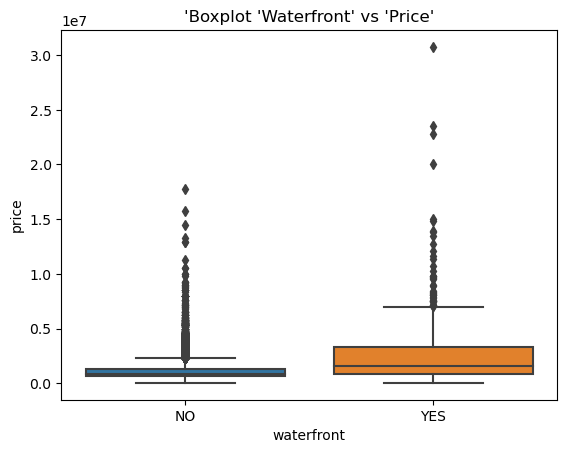

In [4004]:
data['waterfront'] = data['waterfront'].astype('category')
sns.boxplot(x='waterfront', y='price', data=data)
plt.title("'Boxplot 'Waterfront' vs 'Price'")

In [4005]:
X = data[['distance']]
Y = data['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.0009284163853259253

In [4006]:
data = data[data['sqft_living'] <= 5000]
data = data[data['sqft_living'] >= 100]
data = data[data['distance'] <= 25]
data = data[data['price'] <= 2500000]

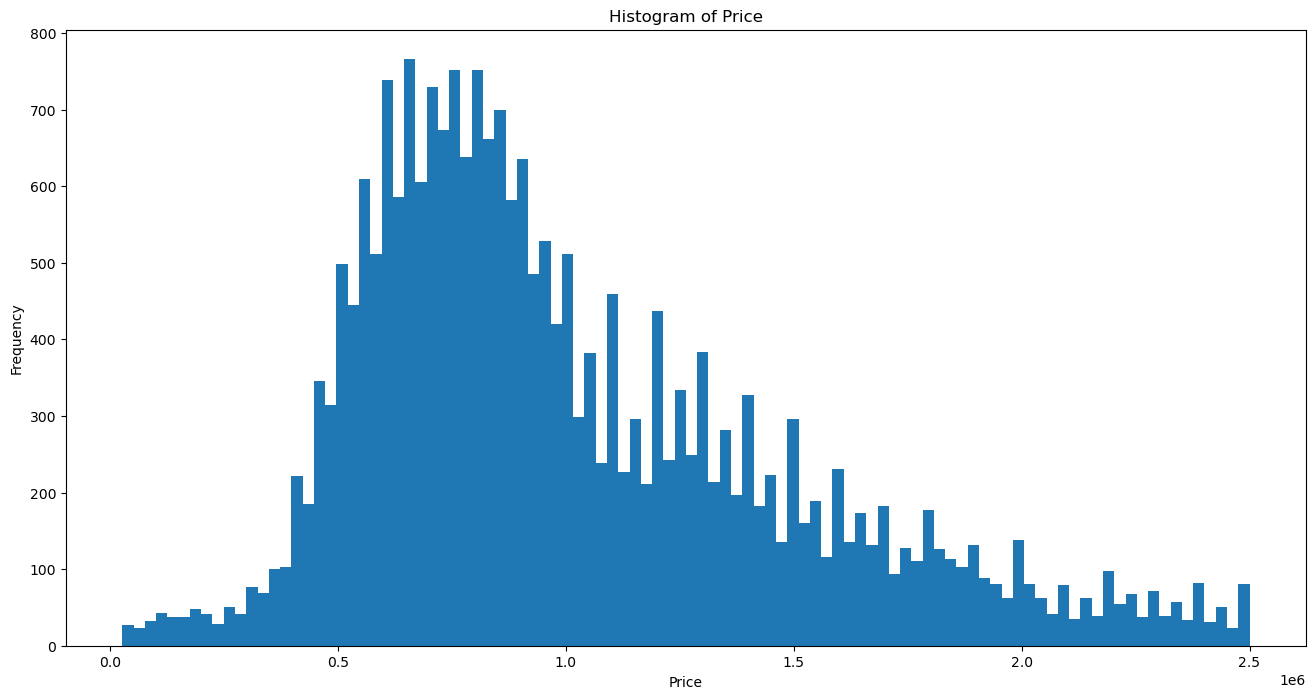

In [4007]:
plt.figure(figsize=(16,8))
plt.hist(data['price'], bins=100)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()

Text(0.5, 1.0, "'Boxplot 'sqft_living' vs 'Price'")

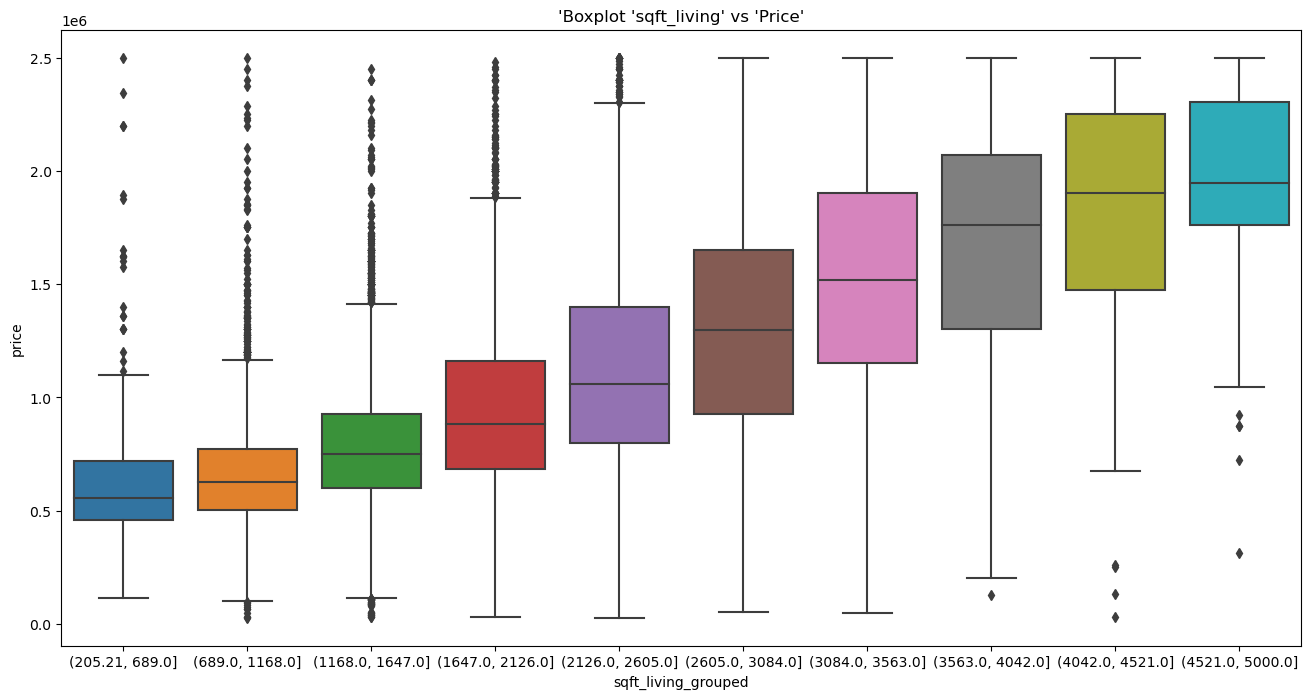

In [4008]:
plt.figure(figsize=(16,8))
data['sqft_living_grouped'] = pd.cut(data['sqft_living'], bins=10)
sns.boxplot(x='sqft_living_grouped', y='price', data=data)
plt.title("'Boxplot 'sqft_living' vs 'Price'")

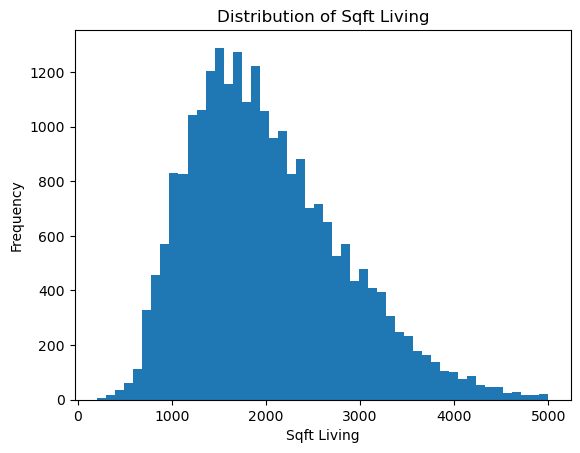

In [4009]:
plt.hist(data['sqft_living'], bins=50)
plt.title("Distribution of Sqft Living")
plt.xlabel("Sqft Living")
plt.ylabel("Frequency")
plt.show()

c:\Users\Jonat\anaconda3\envs\learn-env\lib\site-packages\seaborn\relational.py:573: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


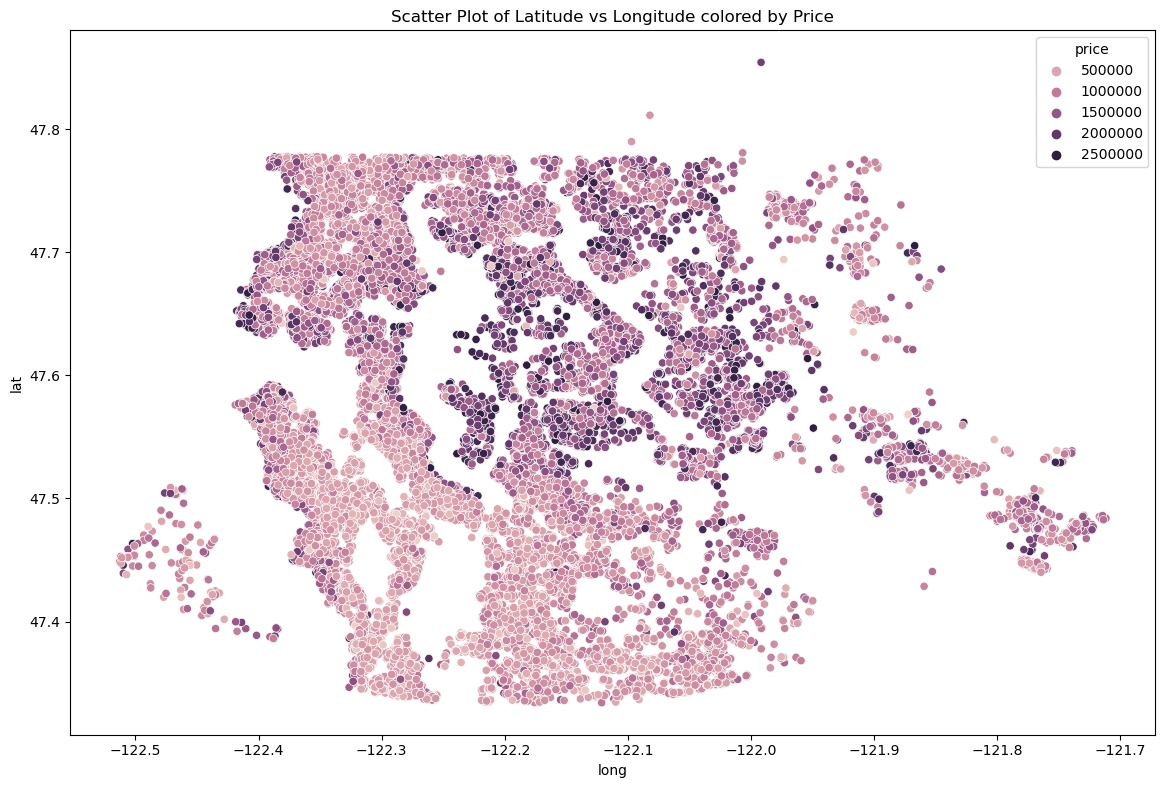

In [4010]:
plt.figure(figsize=(14, 14))
ax = sns.scatterplot(x='long', y='lat', hue='price', data=data, cmap='plasma')
ax.set_aspect('equal')
plt.title("Scatter Plot of Latitude vs Longitude colored by Price")
plt.show()

In [4011]:
data = data.dropna()
data['waterfront'] = data['waterfront'].apply(lambda x: 1 if x == 'YES' else 0)
data['greenbelt'] = data['greenbelt'].apply(lambda x: 1 if x == 'YES' else 0)
data['nuisance'] = data['nuisance'].apply(lambda x: 1 if x == 'YES' else 0)

In [4012]:
data['grade'] = data['grade'].str.extract(r'(\d+)').astype(int)
data['grade'].unique()

array([ 7,  9,  8,  6, 10,  5,  4, 11,  3, 12])

In [4013]:
condition_mapping = {'Very Good': 5, 'Good': 4, 'Average': 3, 'Fair': 2, 'Poor': 1}
data['condition'] = data['condition'].map(condition_mapping)
data['condition'].unique()

array([4, 3, 5, 2, 1], dtype=int64)

In [4014]:
view_mapping = {'NONE': 1, 'FAIR': 2, 'AVERAGE': 3, 'GOOD': 4, 'EXCELLENT': 5}
data['view'] = data['view'].map(view_mapping)
data['view'].unique()

array([1, 3, 5, 2, 4], dtype=int64)

In [4015]:
data = data.drop(['heat_source'], axis=1)
data = data.drop(['sqft_living_grouped'], axis=1)

In [4016]:
data['date'] = pd.to_datetime(data['date'])
data = data[data['date'] < '2022-01-01']
data['price'] = data.apply(lambda row: cpi.inflate(row['price'],row['date'].year), axis=1)

In [4017]:
data['has_been_renovated'] = np.where(data['yr_renovated'] != 0, 1, 0)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,distance,school_grade,has_been_renovated
1,8910500230,2021-12-13,"920,000.00",5,2.50,2770,6703,1.00,0,0,1,3,3,7,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,7.60,70.54,0
2,1180000275,2021-09-29,"311,000.00",6,2.00,2880,6156,1.00,0,0,0,3,3,7,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,6.39,49.05,0
3,1604601802,2021-12-14,"775,000.00",3,3.00,2160,1400,2.00,0,0,0,3,3,9,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,5.37,58.66,0
4,8562780790,2021-08-24,"592,500.00",2,2.00,1120,758,2.00,0,0,1,1,3,7,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,6.31,72.11,0
5,2807100156,2021-07-20,"625,000.00",2,1.00,1190,5688,1.00,0,0,1,1,3,7,PUBLIC,1190,0,300,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.76,-122.34,13.35,70.54,0


In [4018]:
data['zip_code'] = data['address'].str[-20:-15]

In [4019]:
# First, calculate the mean sqft_living for each zip code
zip_code_sqft_lot = data.groupby('zip_code')['sqft_lot'].mean()

# Next, divide the zip codes into sq_ft categories based on their mean sqft_living
zip_code_categories = pd.cut(zip_code_sqft_lot, bins=80, labels=False, retbins=False)

# Count the number of rows in the crime dataset grouped by zip code
zip_code_crime = crime.groupby('zip')['case_number'].count()
zip_code_count = data.groupby('zip_code')['zip_code'].count()

# Finally, add the price category as a new column to the train_data dataframe
data['zip_code_category'] = np.log(data['zip_code'].map(zip_code_categories)+1)

# Map the bin to the corresponding zip code in data
data['zip_code_category_crime'] = np.log(data['zip_code'].map(zip_code_crime) / data['zip_code'].map(zip_code_count))
data['zip_code_category_crime'].fillna(0, inplace=True)


data['has_basement'] = (data['sqft_basement'] > 0).astype(int)
data['has_patio'] = (data['sqft_patio'] > 0).astype(int)
data['sqft_garage'] = (data['sqft_garage'] > 0).astype(int)


In [4020]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,distance,school_grade,has_been_renovated,zip_code,zip_code_category,zip_code_category_crime,has_basement,has_patio
1,8910500230,2021-12-13,"920,000.00",5,2.50,2770,6703,1.00,0,0,1,3,3,7,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.71,-122.36,7.60,70.54,0,98133,0.69,2.37,1,1
2,1180000275,2021-09-29,"311,000.00",6,2.00,2880,6156,1.00,0,0,0,3,3,7,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.50,-122.23,6.39,49.05,0,98178,1.10,2.33,1,0
3,1604601802,2021-12-14,"775,000.00",3,3.00,2160,1400,2.00,0,0,0,3,3,9,PUBLIC,1090,1070,1,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.57,-122.29,5.37,58.66,0,98118,0.69,-1.41,1,1
4,8562780790,2021-08-24,"592,500.00",2,2.00,1120,758,2.00,0,0,1,1,3,7,PUBLIC,1120,550,1,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.53,-122.07,6.31,72.11,0,98027,2.64,1.07,1,1
5,2807100156,2021-07-20,"625,000.00",2,1.00,1190,5688,1.00,0,0,1,1,3,7,PUBLIC,1190,0,1,0,1948,0,"1602 North 185th Street, Shoreline, Washington...",47.76,-122.34,13.35,70.54,0,98133,0.69,2.37,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30142,2539500005,2021-12-14,"880,000.00",4,2.50,2260,5661,1.00,0,0,0,1,3,8,PUBLIC,1310,1300,1,230,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.57,-122.30,5.81,58.66,0,98108,0.00,0.55,1,1
30143,3277800805,2021-09-17,"725,000.00",3,1.00,1680,3249,1.50,0,0,0,1,3,7,PUBLIC,1380,880,1,0,1929,0,"6324 34th Avenue Southwest, Seattle, Washingto...",47.55,-122.37,11.76,41.93,0,98126,0.00,-0.48,1,0
30149,9376300851,2021-10-07,"719,000.00",3,2.50,1270,1141,2.00,0,0,0,1,3,8,PUBLIC,1050,420,1,60,2007,0,"8359 11th Avenue Northwest, Seattle, Washingto...",47.69,-122.37,5.01,70.54,0,98117,0.00,-4.10,1,1
30150,7834800180,2021-11-30,"1,555,000.00",5,2.00,1910,4000,1.50,0,0,0,1,4,8,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.66,-122.33,3.98,58.66,0,98103,0.00,-2.23,1,1


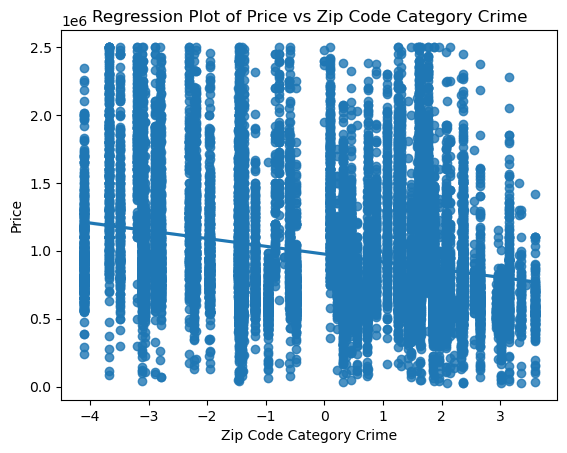

In [4021]:
sns.regplot(x='zip_code_category_crime', y='price', data=data)
plt.xlabel('Zip Code Category Crime')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs Zip Code Category Crime')
plt.show()

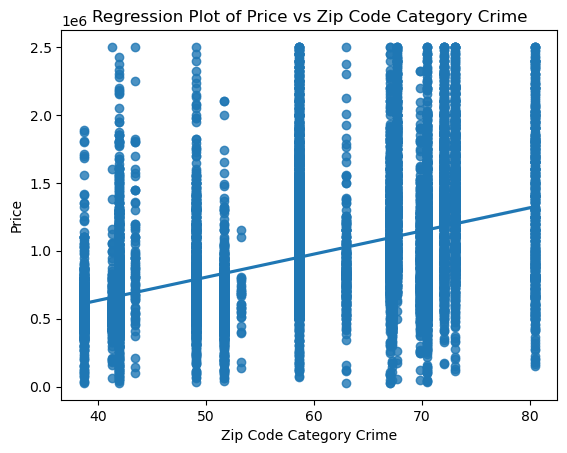

In [4022]:
sns.regplot(x='school_grade', y='price', data=data)
plt.xlabel('Zip Code Category Crime')
plt.ylabel('Price')
plt.title('Regression Plot of Price vs Zip Code Category Crime')
plt.show()

In [4023]:
from sklearn.metrics import r2_score
import numpy as np

X = data['zip_code_category_crime'].values.ravel()
y = data['price'].values

# fit a linear regression model to the data
model = np.polyfit(X, y, 1)

# make predictions using the model
predictions = np.polyval(model, X)

# compute the R-squared score for the model
r2 = r2_score(y, predictions)

print('R-squared score:', r2)

R-squared score: 0.0676120669558774


In [4024]:
# Log transform the columns 'price', 'sqft_living', and 'sqft_lot'
data[['sqft_living', 'sqft_lot']] = np.log(data[['sqft_living', 'sqft_lot']])

# Normalize the columns 'price_log', 'sqft_living_log', and 'sqft_lot_log'
data[['sqft_living', 'sqft_lot']] = (data[['sqft_living', 'sqft_lot']] - data[['sqft_living', 'sqft_lot']].mean()) / data[['sqft_living', 'sqft_lot']].std()



In [4025]:
# One hot encode categoricals
zipcode_ohe = pd.get_dummies(data['zip_code'], drop_first=True)
#Concatenate the new dataframe with X_third_train, call new train set with zipcodes X_third_train_zip
data = pd.concat([data, zipcode_ohe], axis=1)

In [4026]:
data.drop(['zip_code'], axis=1, inplace=True)

In [4027]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15474 entries, 1 to 30151
Columns: 103 entries, id to 98296
dtypes: category(1), datetime64[ns](1), float64(11), int32(5), int64(11), object(2), uint8(72)
memory usage: 4.4+ MB


In [4028]:
X = data[['distance','school_grade','zip_code_category','zip_code_category_crime','grade','sqft_living','waterfront','condition','view']]
y = data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     3179.
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:26:16   Log-Likelihood:            -2.1571e+05
No. Observations:               15474   AIC:                         4.314e+05
Df Residuals:                   15464   BIC:                         4.315e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -4

In [4029]:
from scipy.stats import skew, kurtosis

# compute skewness and kurtosis of the data
data_skewness = skew(data['zip_code_category'])
data_kurtosis = kurtosis(data['zip_code_category'])

print('Skewness:', data_skewness)
print('Kurtosis:', data_kurtosis)

Skewness: 0.36204884775193835
Kurtosis: -0.3231613433330782


In [4030]:
train_data, test_data, train_labels, test_labels = train_test_split(data.drop(columns=["id", "address", "lat", "long","sewer_system",'sqft_above','sqft_basement','sqft_patio','sqft_garage','sqft_lot']), data["price"], test_size=0.33, random_state=42)

In [4031]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,greenbelt,nuisance,view,condition,grade,yr_built,yr_renovated,distance,school_grade,has_been_renovated,zip_code_category,zip_code_category_crime,has_basement,has_patio,98002,98003,98004,98005,98006,98007,98008,98010,98011,98014,98019,98024,98027,98028,98029,98030,98031,98032,98033,98034,98038,98039,98040,98042,98045,98050,98051,98052,98053,98055,98056,98057,98058,98059,98065,98070,98072,98074,98075,98077,98092,98102,98103,98105,98106,98107,98108,98109,98112,98115,98116,98117,98118,98119,98122,98125,98126,98133,98136,98144,98146,98148,98155,98166,98168,98177,98178,98188,98198,98199,98272,98296
15204,2021-10-08,"2,150,000.00",4,2.50,0.97,2.00,0,0,0,1,5,8,1995,0,1.42,58.66,0,0.00,-1.37,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6079,2021-10-25,"649,500.00",3,3.00,-0.73,2.00,0,0,0,1,3,8,2004,0,9.92,58.66,0,0.00,-0.48,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11382,2021-11-19,"835,000.00",3,2.00,-0.59,1.00,0,0,0,1,3,7,1954,0,8.98,67.10,0,1.39,-1.47,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
28367,2021-09-01,"1,125,000.00",4,2.50,0.73,1.00,0,0,0,1,3,8,1978,0,8.99,67.10,0,2.30,2.36,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
25870,2021-06-17,"1,060,000.00",3,2.00,0.11,1.00,0,0,0,1,4,8,1949,0,6.04,70.54,0,0.00,-3.12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4032]:

train_data['yr_renovated'] = np.where(train_data['yr_renovated'] == 0, train_data['yr_built'], train_data['yr_renovated'])
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['year'] = train_data['date'].dt.year
train_data['years_since_build_or_renov'] = train_data['year'] - train_data[['yr_built', 'yr_renovated']].min(axis=1)
train_data.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)

test_data['yr_renovated'] = np.where(test_data['yr_renovated'] == 0, test_data['yr_built'], test_data['yr_renovated'])
test_data['date'] = pd.to_datetime(test_data['date'])
test_data['year'] = test_data['date'].dt.year
test_data['years_since_build_or_renov'] = test_data['year'] - test_data[['yr_built', 'yr_renovated']].min(axis=1)
test_data.drop(['date', 'year', 'yr_built', 'yr_renovated'], axis=1, inplace=True)


In [4033]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     292.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:26:16   Log-Likelihood:            -1.4351e+05
No. Observations:               10367   AIC:                         2.872e+05
Df Residuals:                   10279   BIC:                         2.878e+05
Df Model:                          87                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [4034]:
train_data.drop(['bathrooms'], axis=1, inplace=True)

test_data.drop(['bathrooms'], axis=1, inplace=True)

In [4035]:
X = train_data.drop(['price'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     292.7
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:26:16   Log-Likelihood:            -1.4355e+05
No. Observations:               10367   AIC:                         2.873e+05
Df Residuals:                   10280   BIC:                         2.879e+05
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

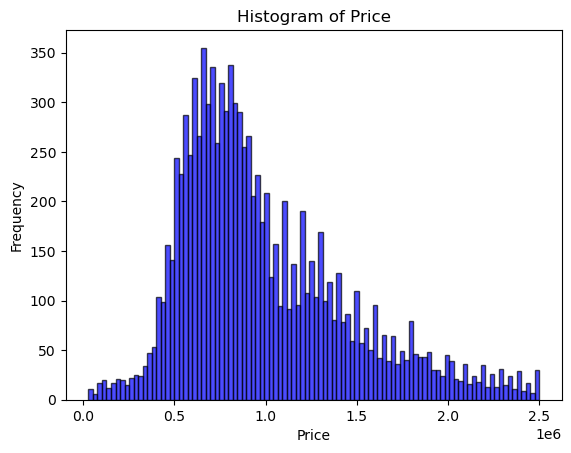

In [4036]:
plt.hist(train_data['price'], bins=100, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.show()


In [4037]:
#train_data.drop(["has_patio"], axis=1, inplace=True)
#test_data.drop(["has_patio"], axis=1, inplace=True)

#train_data.drop(["floors"], axis=1, inplace=True)
#test_data.drop(["floors"], axis=1, inplace=True)

#train_data.drop(["nuisance"], axis=1, inplace=True)
#test_data.drop(["nuisance"], axis=1, inplace=True)

train_data.drop(["greenbelt"], axis=1, inplace=True)
test_data.drop(["greenbelt"], axis=1, inplace=True)

#train_data.drop(["condition"], axis=1, inplace=True)
#test_data.drop(["condition"], axis=1, inplace=True)

#train_data.drop(["sqft_living"], axis=1, inplace=True)
#test_data.drop(["sqft_living"], axis=1, inplace=True)

                   

In [4038]:
train_data[['distance', 'years_since_build_or_renov', 'school_grade']] = (train_data[['distance', 'years_since_build_or_renov', 'school_grade']] - train_data[['distance', 'years_since_build_or_renov', 'school_grade']].mean()) / train_data[[ 'distance', 'years_since_build_or_renov', 'school_grade']].std()

test_data[['distance', 'years_since_build_or_renov', 'school_grade']] = (test_data[['distance', 'years_since_build_or_renov', 'school_grade']] - test_data[['distance', 'years_since_build_or_renov', 'school_grade']].mean()) / test_data[[ 'distance', 'years_since_build_or_renov', 'school_grade']].std()

In [4039]:
X = train_data.drop(['price','bedrooms'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     299.4
Date:                Wed, 15 Feb 2023   Prob (F-statistic):               0.00
Time:                        17:26:17   Log-Likelihood:            -1.4356e+05
No. Observations:               10367   AIC:                         2.873e+05
Df Residuals:                   10282   BIC:                         2.879e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [4040]:
X = train_data.drop(['price','bedrooms'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model2 = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log())).fit()
print(model2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  price   No. Observations:                10367
Model:                            GLM   Df Residuals:                    10282
Model Family:                 Poisson   Df Model:                           84
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.7859e+08
Date:                Wed, 15 Feb 2023   Deviance:                   5.5702e+08
Time:                        17:26:20   Pearson chi2:                 5.50e+08
No. Iterations:                   100   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [4041]:
X = train_data.drop(['price','bedrooms'], axis=1)
y = train_data['price']

X = sm.add_constant(X)
model3 = sm.RLM(y, X).fit()
print(model3.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                  price   No. Observations:                10367
Model:                            RLM   Df Residuals:                    10282
Method:                          IRLS   Df Model:                           84
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 15 Feb 2023                                         
Time:                        17:26:21                                         
No. Iterations:                     4                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

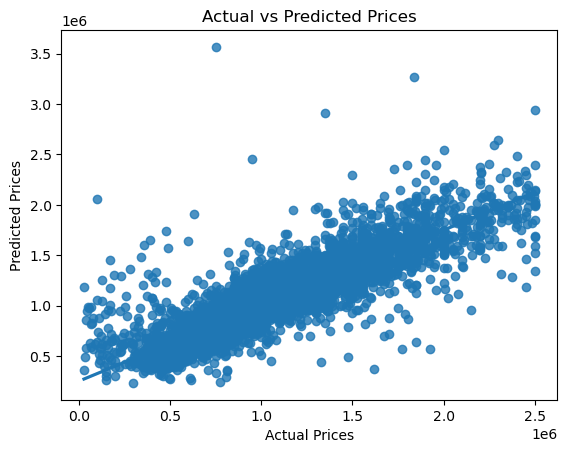

In [4042]:
# Fit the model to the training data
#model = sm.OLS(train_data['price'], train_data.drop(['price'], axis=1))
#results = model.fit()

# Use the fitted model to make predictions on the test data
X_test = sm.add_constant(test_data.drop(['price','bedrooms'], axis=1))
predictions = model2.predict(X_test)
# Compare the predicted values with the actual prices in the test data
sns.regplot(x=test_data['price'], y=predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()

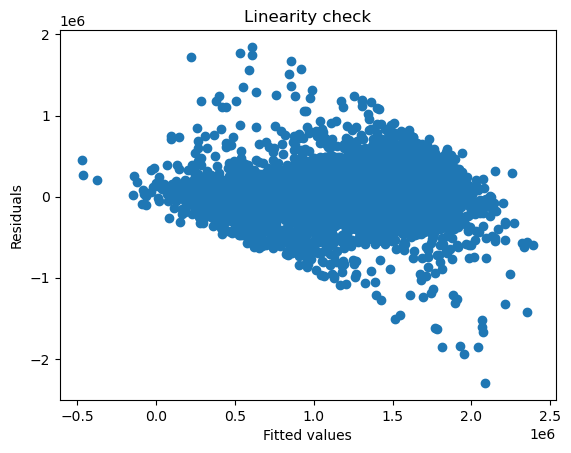

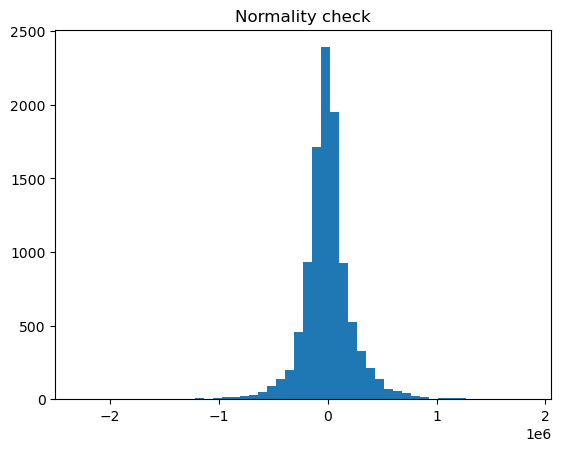

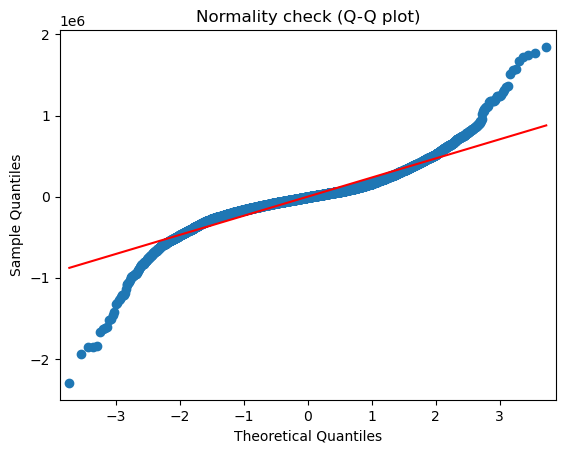

In [4043]:
# calculate the residuals
residuals = model2.resid_response

# Plot the residuals against the fitted values to check for linearity
plt.scatter(model.fittedvalues, residuals)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Linearity check")
plt.show()

# Plot a histogram of the residuals to check for normality
plt.hist(residuals, bins=50)
plt.title("Normality check")
plt.show()

# Plot a Q-Q plot of the residuals to check for normality

sm.qqplot(residuals, line='s')
plt.title("Normality check (Q-Q plot)")
plt.show()

In [4044]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(test_data['price'], predictions))

# Calculate the MAE
mae = mean_absolute_error(test_data['price'], predictions)

r2 = r2_score(test_data['price'], predictions)


print("RMSE:", rmse)
print("MAE:", mae)
print('R-squared score:', r2)

RMSE: 226799.2998750783
MAE: 148871.65753316414
R-squared score: 0.7575971621613934


In [4045]:
pd.options.display.float_format = '{:,.2f}'.format
test_data['id'] = test_data.index
difference = pd.DataFrame({'id': test_data['id'], 'difference': test_data['price'] - predictions})
index_of_largest_difference = difference['difference'].idxmax()
print("Record with the largest difference:")
print(test_data.loc[index_of_largest_difference])
print("Predicted price:", predictions[index_of_largest_difference])

Record with the largest difference:
price                        1,925,000.00
bedrooms                             1.00
sqft_living                         -1.79
floors                               1.00
waterfront                           0.00
                                 ...     
98199                                0.00
98272                                0.00
98296                                0.00
years_since_build_or_renov           1.18
id                               5,915.00
Name: 5915, Length: 90, dtype: float64
Predicted price: 571396.9508308633
